# Analysis and Classification of Attacks using Realistic Botnet Dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Training Dataset
data = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [4]:
# General Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


## Exploratory Data Analysis

In [5]:
data.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06
mean,1.834209e+06,1.212973e+05,8.869639e-01,8.254997e+01,1.017208e+00,3.134219e+00,2.230471e+00,9.245766e+01,4.303064e-01,3.128290e+00,3.019269e+00,9.998739e-01
std,1.059058e+06,7.578700e+04,8.036391e-01,2.439019e+01,1.483551e+00,1.187107e+00,1.517766e+00,1.816651e+01,5.623304e+01,7.845494e+02,1.860915e+00,1.122750e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171090e+05,5.484700e+04,2.999700e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819340e-01,1.000000e+02,0.000000e+00,1.558450e-01,2.804170e-01,1.000000e+00
50%,1.834316e+06,1.177370e+05,7.925750e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.689973e+00,1.000000e+02,0.000000e+00,2.837800e-01,4.008429e+00,1.000000e+00
75%,2.751250e+06,1.848700e+05,1.745220e+00,1.000000e+02,2.147949e+00,4.000000e+00,3.565061e+00,1.000000e+02,0.000000e+00,4.880000e-01,4.292426e+00,1.000000e+00
max,3.668522e+06,2.622110e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [6]:
data["proto"].value_counts()

udp          1596819
tcp          1330598
icmp            7228
arp              166
ipv6-icmp          6
Name: proto, dtype: int64

In [7]:
data["saddr"].value_counts()

192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:c038          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:89ee          2
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [8]:
data["sport"].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
39364       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [9]:
data["daddr"].value_counts()

192.168.100.3      1900562
192.168.100.5       361192
192.168.100.7       332161
192.168.100.6       329679
192.168.100.150       3040
                    ...   
205.251.199.148          1
192.33.14.30             1
192.55.83.30             1
205.251.194.201          1
205.251.198.119          1
Name: daddr, Length: 81, dtype: int64

In [10]:
data["dport"].value_counts()

80       2858794
1           5379
3306        3757
53           275
-1           166
          ...   
40344          1
3754           1
6459           1
26822          1
61804          1
Name: dport, Length: 6906, dtype: int64

In [11]:
data["category"].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [12]:
data["attack"].value_counts()

1    2934447
0        370
Name: attack, dtype: int64

In [13]:
data["subcategory"].value_counts()

UDP                  1584650
TCP                  1274843
Service_Scan           58626
OS_Fingerprint         14293
HTTP                    1970
Normal                   370
Keylogging                59
Data_Exfiltration          6
Name: subcategory, dtype: int64

In [14]:
data['target'] = data['category'] + "_" + data['subcategory']
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP,DDoS_UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP,DDoS_TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP,DDoS_TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP,DoS_UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP,DDoS_UDP


<AxesSubplot:xlabel='target', ylabel='count'>

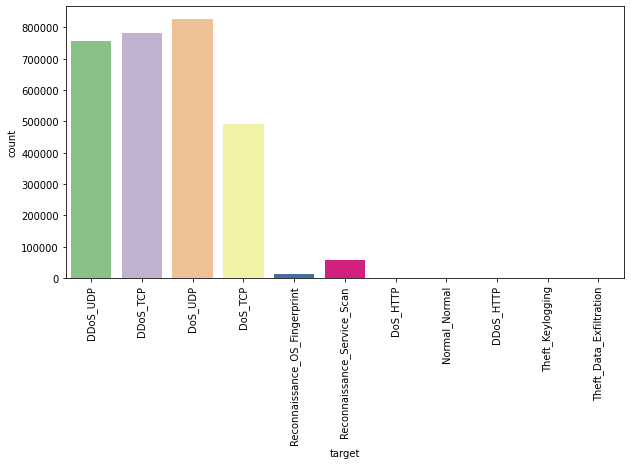

In [15]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(data['target'],palette='Accent')

### Extracting 10 best features

In [17]:
ten_best_features = data[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
target_features = data[['attack','category','subcategory']]

## Data Preprocessing

In [18]:
# Label Encoding the target columns
le = LabelEncoder()
target_features['category'] = le.fit_transform(target_features['category'])
target_features['subcategory'] = le.fit_transform(target_features['subcategory'])

target_features.head()

,attack,category,subcategory
0,1,0,7
1,1,0,6
2,1,0,6
3,1,1,7
4,1,0,7


In [19]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(ten_best_features,target_features)

In [20]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Defining the ML Model Classes

In [21]:
class RandomForest:
    def __init__(self,max_depth):
        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)
        self.rfc_category = RandomForestClassifier(max_depth=max_depth)
        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)
    
    def fit(self,X_train,y_train):
        self.rfc_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.rfc_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.rfc_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.rfc_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.rfc_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.rfc_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [22]:
class NaiveBayes:
    def __init__(self):
        self.nb_attack = GaussianNB()
        self.nb_category = GaussianNB()
        self.nb_subcategory = GaussianNB()
    
    def fit(self,X_train,y_train):
        self.nb_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.nb_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.nb_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.nb_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.nb_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.nb_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [23]:
class DecisionTree:
    def __init__(self,criterion,max_depth=5):
        self.dtree_attack = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_category = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
        self.dtree_subcategory = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)
    
    def fit(self,X_train,y_train):
        self.dtree_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.dtree_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.dtree_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.dtree_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.dtree_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.dtree_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [24]:
class GradientBoost:
    def __init__(self):
        self.xgb_attack = XGBClassifier()
        self.xgb_category = XGBClassifier()
        self.xgb_subcategory = XGBClassifier()
    
    def fit(self,X_train,y_train):
        self.xgb_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.xgb_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.xgb_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.xgb_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.xgb_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.xgb_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [25]:
class MLP:
    def __init__(self,hidden_layer_sizes,activation,solver,max_iter):
        self.mlp_attack  = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)
        self.mlp_category = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)
        self.mlp_subcategory = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)
    
    def fit(self,X_train,y_train):
        self.mlp_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.mlp_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.mlp_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.mlp_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.mlp_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.mlp_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [26]:
class SupportVectorMachine:
    def __init__(self):
        self.svc_attack  = LinearSVC()
        self.svc_category = LinearSVC()
        self.svc_subcategory = LinearSVC()
    
    def fit(self,X_train,y_train):
        self.svc_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.svc_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.svc_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.svc_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.svc_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.svc_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [27]:
class Logistic_Regression:
    def __init__(self):
        self.lr_attack  = LogisticRegression()
        self.lr_category = LogisticRegression()
        self.lr_subcategory = LogisticRegression()
    
    def fit(self,X_train,y_train):
        self.lr_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.lr_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.lr_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.lr_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.lr_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.lr_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

### Validation of ML Models on Training Dataset

**Random Forest**

In [28]:
rf = RandomForest(max_depth=3)
rf.fit(X_train,y_train)

predictions_rfc = rf.predict(X_test)

In [29]:
print(confusion_matrix(y_test['attack'],predictions_rfc['attack']))
print(classification_report(y_test['attack'],predictions_rfc['attack']))

[[     2     81]
 [     0 733622]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        83
           1       1.00      1.00      1.00    733622

    accuracy                           1.00    733705
   macro avg       1.00      0.51      0.52    733705
weighted avg       1.00      1.00      1.00    733705



In [30]:
print(confusion_matrix(y_test['category'],predictions_rfc['category']))
print(classification_report(y_test['category'],predictions_rfc['category']))

[[364823  20695      0      0      0]
 [ 26729 303448      0      1      0]
 [     0     58      0     25      0]
 [  9916   1457      0   6538      0]
 [     0      3      0     12      0]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93    385518
           1       0.93      0.92      0.93    330178
           2       0.00      0.00      0.00        83
           3       0.99      0.37      0.53     17911
           4       0.00      0.00      0.00        15

    accuracy                           0.92    733705
   macro avg       0.57      0.45      0.48    733705
weighted avg       0.92      0.92      0.92    733705



In [31]:
print(confusion_matrix(y_test['subcategory'],predictions_rfc['subcategory']))
print(classification_report(y_test['subcategory'],predictions_rfc['subcategory']))

[[     0      0      0      0      0    463      0]
 [     0      0      0      0     12      2      1]
 [     0      0      0      0     25     57      1]
 [     0      0      0      0    161   3273      5]
 [     0      0      0      0   6383   8082      7]
 [     0      0      0      0      0 319129    221]
 [     0      0      0      0      1      6 395876]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       463
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        83
           4       0.00      0.00      0.00      3439
           5       0.97      0.44      0.61     14472
           6       0.96      1.00      0.98    319350
           7       1.00      1.00      1.00    395883

    accuracy                           0.98    733705
   macro avg       0.42      0.35      0.37    733705
weighted avg       0.98      0.98      0.98    733705



In [32]:
rf.rfc_attack.score(X_test,y_test['attack'])

0.9998896014065598

In [33]:
rf.rfc_category.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9197279560586339

In [34]:
rf.rfc_subcategory.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1),
                                    np.array(predictions_rfc['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9832125990691082

**Naive Bayes**

In [35]:
nb = NaiveBayes()
nb.fit(X_train,y_train)

predictions_nb = nb.predict(X_test)

In [36]:
print(confusion_matrix(y_test['attack'],predictions_nb['attack']))
print(classification_report(y_test['attack'],predictions_nb['attack']))

[[    79      4]
 [  2539 731083]]
              precision    recall  f1-score   support

           0       0.03      0.95      0.06        83
           1       1.00      1.00      1.00    733622

    accuracy                           1.00    733705
   macro avg       0.52      0.97      0.53    733705
weighted avg       1.00      1.00      1.00    733705



In [37]:
print(confusion_matrix(y_test['category'],predictions_nb['category']))
print(classification_report(y_test['category'],predictions_nb['category']))

[[368747  16630     25    116      0]
 [184021 145189    556    412      0]
 [     0      3     79      1      0]
 [ 10421   1899   1954   3637      0]
 [     0      0      4      0     11]]
              precision    recall  f1-score   support

           0       0.65      0.96      0.78    385518
           1       0.89      0.44      0.59    330178
           2       0.03      0.95      0.06        83
           3       0.87      0.20      0.33     17911
           4       1.00      0.73      0.85        15

    accuracy                           0.71    733705
   macro avg       0.69      0.66      0.52    733705
weighted avg       0.76      0.71      0.68    733705



In [38]:
print(confusion_matrix(y_test['subcategory'],predictions_nb['subcategory']))
print(classification_report(y_test['subcategory'],predictions_nb['subcategory']))

[[   290      0      9      3    148     13      0]
 [     0     11      4      0      0      0      0]
 [     0      0     79      0      1      3      0]
 [   222      0    103      1    131   2982      0]
 [   505      0   1851    472   3033   8611      0]
 [   827      0    558      5    372 317588      0]
 [     0      0     14      0      0     17 395852]]
              precision    recall  f1-score   support

           1       0.16      0.63      0.25       463
           2       1.00      0.73      0.85        15
           3       0.03      0.95      0.06        83
           4       0.00      0.00      0.00      3439
           5       0.82      0.21      0.33     14472
           6       0.96      0.99      0.98    319350
           7       1.00      1.00      1.00    395883

    accuracy                           0.98    733705
   macro avg       0.57      0.65      0.50    733705
weighted avg       0.98      0.98      0.97    733705



**Decision Tree (Information Gain)**

In [39]:
dtree_ig = DecisionTree('entropy')
dtree_ig.fit(X_train,y_train)
predictions_dtree_ig = dtree_ig.predict(X_test)

In [40]:
print(confusion_matrix(y_test['attack'],predictions_dtree_ig['attack']))
print(classification_report(y_test['attack'],predictions_dtree_ig['attack']))

[[    23     60]
 [     0 733622]]
              precision    recall  f1-score   support

           0       1.00      0.28      0.43        83
           1       1.00      1.00      1.00    733622

    accuracy                           1.00    733705
   macro avg       1.00      0.64      0.72    733705
weighted avg       1.00      1.00      1.00    733705



In [41]:
print(confusion_matrix(y_test['category'],predictions_dtree_ig['category']))
print(classification_report(y_test['category'],predictions_dtree_ig['category']))

[[339331  45661      0    526      0]
 [ 11506 318635      0     37      0]
 [     0     12     22     49      0]
 [   354   7263      0  10294      0]
 [     0      2      0     13      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    385518
           1       0.86      0.97      0.91    330178
           2       1.00      0.27      0.42        83
           3       0.94      0.57      0.71     17911
           4       0.00      0.00      0.00        15

    accuracy                           0.91    733705
   macro avg       0.75      0.54      0.59    733705
weighted avg       0.92      0.91      0.91    733705



In [42]:
print(confusion_matrix(y_test['subcategory'],predictions_dtree_ig['subcategory']))
print(classification_report(y_test['subcategory'],predictions_dtree_ig['subcategory']))

[[   338      0      0      0     95     30      0]
 [     2      1      0      0     12      0      0]
 [     0      0     34     13     35      1      0]
 [     0      0      1    933    498   1989     18]
 [    15      0      3    300   8563   5578     13]
 [    17      0      0      0    455 318876      2]
 [     0      0     12      1      0      3 395867]]
              precision    recall  f1-score   support

           1       0.91      0.73      0.81       463
           2       1.00      0.07      0.12        15
           3       0.68      0.41      0.51        83
           4       0.75      0.27      0.40      3439
           5       0.89      0.59      0.71     14472
           6       0.98      1.00      0.99    319350
           7       1.00      1.00      1.00    395883

    accuracy                           0.99    733705
   macro avg       0.89      0.58      0.65    733705
weighted avg       0.99      0.99      0.99    733705



In [43]:
dtree_ig.dtree_attack.score(X_test,y_test['attack'])

0.9999182232641184

In [44]:
dtree_ig.dtree_category.score(np.concatenate((X_test,np.array(predictions_dtree_ig['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9108320101403152

In [45]:
dtree_ig.dtree_subcategory.score(np.concatenate((X_test,np.array(predictions_dtree_ig['attack']).reshape(-1,1),
                                        np.array(predictions_dtree_ig['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9876067356771454

**Decision Tree (Gini Index)**

In [46]:
dtree_gini = DecisionTree('gini')
dtree_gini.fit(X_train,y_train)
predictions_dtree_gini = dtree_gini.predict(X_test)

In [47]:
print(confusion_matrix(y_test['attack'],predictions_dtree_gini['attack']))
print(classification_report(y_test['attack'],predictions_dtree_gini['attack']))

[[    27     56]
 [     3 733619]]
              precision    recall  f1-score   support

           0       0.90      0.33      0.48        83
           1       1.00      1.00      1.00    733622

    accuracy                           1.00    733705
   macro avg       0.95      0.66      0.74    733705
weighted avg       1.00      1.00      1.00    733705



In [48]:
print(confusion_matrix(y_test['category'],predictions_dtree_gini['category']))
print(classification_report(y_test['category'],predictions_dtree_gini['category']))

[[338225  46831      0    462      0]
 [  8425 321747      0      6      0]
 [     0     13     26     44      0]
 [    88   7183      3  10637      0]
 [     0      1      0     14      0]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92    385518
           1       0.86      0.97      0.91    330178
           2       0.90      0.31      0.46        83
           3       0.95      0.59      0.73     17911
           4       0.00      0.00      0.00        15

    accuracy                           0.91    733705
   macro avg       0.74      0.55      0.61    733705
weighted avg       0.92      0.91      0.91    733705



In [49]:
print(confusion_matrix(y_test['subcategory'],predictions_dtree_gini['subcategory']))
print(classification_report(y_test['subcategory'],predictions_dtree_gini['subcategory']))

[[   385      0      0      0      5     73      0]
 [     0      1      0      0     14      0      0]
 [    11      0      4     17     49      2      0]
 [    11      0      0    820    666   1932     10]
 [    15      1      1     91   9062   5301      1]
 [    63      0      0      0    462 318825      0]
 [     0      0      0      1      0      6 395876]]
              precision    recall  f1-score   support

           1       0.79      0.83      0.81       463
           2       0.50      0.07      0.12        15
           3       0.80      0.05      0.09        83
           4       0.88      0.24      0.38      3439
           5       0.88      0.63      0.73     14472
           6       0.98      1.00      0.99    319350
           7       1.00      1.00      1.00    395883

    accuracy                           0.99    733705
   macro avg       0.83      0.54      0.59    733705
weighted avg       0.99      0.99      0.99    733705



In [50]:
dtree_gini.dtree_attack.score(X_test,y_test['attack'])

0.9999195862097164

In [51]:
dtree_gini.dtree_category.score(np.concatenate((X_test,np.array(predictions_dtree_gini['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9140390211324715

In [52]:
dtree_gini.dtree_subcategory.score(np.concatenate((X_test,np.array(predictions_dtree_gini['attack']).reshape(-1,1),
                                        np.array(predictions_dtree_gini['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.988098759038033

**Gradient Boost**

In [53]:
xgb = GradientBoost()
xgb.fit(X_train,y_train)
predictions_xgb = xgb.predict(X_test)

In [54]:
print(confusion_matrix(y_test['attack'],predictions_xgb['attack']))
print(classification_report(y_test['attack'],predictions_xgb['attack']))

[[    78      5]
 [     3 733619]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       1.00      1.00      1.00    733622

    accuracy                           1.00    733705
   macro avg       0.98      0.97      0.98    733705
weighted avg       1.00      1.00      1.00    733705



In [55]:
print(confusion_matrix(y_test['category'],predictions_xgb['category']))
print(classification_report(y_test['category'],predictions_xgb['category']))

[[385503     15      0      0      0]
 [    27 330151      0      0      0]
 [     0      1     78      4      0]
 [     5      1      3  17902      0]
 [     0      1      0      1     13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    385518
           1       1.00      1.00      1.00    330178
           2       0.96      0.94      0.95        83
           3       1.00      1.00      1.00     17911
           4       1.00      0.87      0.93        15

    accuracy                           1.00    733705
   macro avg       0.99      0.96      0.98    733705
weighted avg       1.00      1.00      1.00    733705



In [56]:
print(confusion_matrix(y_test['subcategory'],predictions_xgb['subcategory']))
print(classification_report(y_test['subcategory'],predictions_xgb['subcategory']))

[[   461      0      0      0      0      2      0]
 [     1     13      0      0      1      0      0]
 [     1      0     78      0      4      0      0]
 [     0      0      1   3191    244      3      0]
 [     0      0      2    184  14283      3      0]
 [     0      0      0      0      0 319349      1]
 [     0      0      0      0      0      4 395879]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       463
           2       1.00      0.87      0.93        15
           3       0.96      0.94      0.95        83
           4       0.95      0.93      0.94      3439
           5       0.98      0.99      0.98     14472
           6       1.00      1.00      1.00    319350
           7       1.00      1.00      1.00    395883

    accuracy                           1.00    733705
   macro avg       0.98      0.96      0.97    733705
weighted avg       1.00      1.00      1.00    733705



In [57]:
xgb.xgb_attack.score(X_test,y_test['attack'])

0.9999890964352158

In [58]:
xgb.xgb_category.score(np.concatenate((X_test,np.array(predictions_xgb['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9999209491553145

In [59]:
xgb.xgb_subcategory.score(np.concatenate((X_test,np.array(predictions_xgb['attack']).reshape(-1,1),
                                        np.array(predictions_xgb['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9993853115352901

**Multi Layer Perceptron**

In [60]:
mlp = MLP(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predictions_mlp = mlp.predict(X_test)

In [61]:
print(confusion_matrix(y_test['attack'],predictions_mlp['attack']))
print(classification_report(y_test['attack'],predictions_mlp['attack']))

[[    79      4]
 [    29 733593]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        83
           1       1.00      1.00      1.00    733622

    accuracy                           1.00    733705
   macro avg       0.87      0.98      0.91    733705
weighted avg       1.00      1.00      1.00    733705



In [62]:
print(confusion_matrix(y_test['category'],predictions_mlp['category']))
print(classification_report(y_test['category'],predictions_mlp['category']))

[[374055  10644      3    816      0]
 [ 17280 312790      1    107      0]
 [    14      7      6     56      0]
 [   150    283      1  17477      0]
 [     1     10      0      4      0]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    385518
           1       0.97      0.95      0.96    330178
           2       0.55      0.07      0.13        83
           3       0.95      0.98      0.96     17911
           4       0.00      0.00      0.00        15

    accuracy                           0.96    733705
   macro avg       0.68      0.59      0.60    733705
weighted avg       0.96      0.96      0.96    733705



In [63]:
print(confusion_matrix(y_test['subcategory'],predictions_mlp['subcategory']))
print(classification_report(y_test['subcategory'],predictions_mlp['subcategory']))

[[   289      0      0      0     96     78      0]
 [     0      0      1      0      3     11      0]
 [     1      0     11      1     54     15      1]
 [     2      0      1   1095   2168    172      1]
 [     5      0      0    291  13919    257      0]
 [     9      0      0     57    759 318523      2]
 [     0      0      0      0      1      3 395879]]
              precision    recall  f1-score   support

           1       0.94      0.62      0.75       463
           2       0.00      0.00      0.00        15
           3       0.85      0.13      0.23        83
           4       0.76      0.32      0.45      3439
           5       0.82      0.96      0.88     14472
           6       1.00      1.00      1.00    319350
           7       1.00      1.00      1.00    395883

    accuracy                           0.99    733705
   macro avg       0.77      0.58      0.62    733705
weighted avg       0.99      0.99      0.99    733705



In [64]:
mlp.mlp_attack.score(X_test,y_test['attack'])

0.9999550227952652

In [65]:
mlp.mlp_category.score(np.concatenate((X_test,np.array(predictions_mlp['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9599607471667768

In [66]:
mlp.mlp_subcategory.score(np.concatenate((X_test,np.array(predictions_mlp['attack']).reshape(-1,1),
                                        np.array(predictions_mlp['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9945632100094725

**Support Vector Machine**

In [67]:
svc =  SupportVectorMachine()
svc.fit(X_train,y_train)

predictions_svc = svc.predict(X_test)

In [68]:
print(confusion_matrix(y_test['attack'],predictions_svc['attack']))
print(classification_report(y_test['attack'],predictions_svc['attack']))

[[     1     82]
 [     0 733622]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        83
           1       1.00      1.00      1.00    733622

    accuracy                           1.00    733705
   macro avg       1.00      0.51      0.51    733705
weighted avg       1.00      1.00      1.00    733705



In [69]:
print(confusion_matrix(y_test['category'],predictions_svc['category']))
print(classification_report(y_test['category'],predictions_svc['category']))

[[335227  50048      0    243      0]
 [ 58307 271790      0     81      0]
 [     1     81      1      0      0]
 [ 10012   2264      1   5634      0]
 [     0     13      0      2      0]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85    385518
           1       0.84      0.82      0.83    330178
           2       0.50      0.01      0.02        83
           3       0.95      0.31      0.47     17911
           4       0.00      0.00      0.00        15

    accuracy                           0.84    733705
   macro avg       0.62      0.40      0.44    733705
weighted avg       0.84      0.84      0.83    733705



In [70]:
print(confusion_matrix(y_test['subcategory'],predictions_svc['subcategory']))
print(classification_report(y_test['subcategory'],predictions_svc['subcategory']))

[[     0      0      0      0     51    412      0]
 [     0      0      0      0      2     12      1]
 [     0      0      3      1      0     75      4]
 [     1      0      0     18    305   3028     87]
 [     0      0      4     10   5280   7391   1787]
 [     0      0      4      0    273 315700   3373]
 [     0      0      0      0      0   8928 386955]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       463
           2       0.00      0.00      0.00        15
           3       0.27      0.04      0.06        83
           4       0.62      0.01      0.01      3439
           5       0.89      0.36      0.52     14472
           6       0.94      0.99      0.96    319350
           7       0.99      0.98      0.98    395883

    accuracy                           0.96    733705
   macro avg       0.53      0.34      0.36    733705
weighted avg       0.96      0.96      0.96    733705



In [71]:
svc.svc_attack.score(X_test,y_test['attack'])

0.9998882384609619

In [72]:
svc.svc_category.score(np.concatenate((X_test,np.array(predictions_svc['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.8350113465221036

In [73]:
svc.svc_subcategory.score(np.concatenate((X_test,np.array(predictions_svc['attack']).reshape(-1,1),
                                        np.array(predictions_svc['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9649055137964169

**Logistic Regression**

In [74]:
lr =  Logistic_Regression()
lr.fit(X_train,y_train)

predictions_lr = lr.predict(X_test)

In [75]:
print(confusion_matrix(y_test['attack'],predictions_lr['attack']))
print(classification_report(y_test['attack'],predictions_lr['attack']))



[[     1     82]
 [     7 733615]]
              precision    recall  f1-score   support

           0       0.12      0.01      0.02        83
           1       1.00      1.00      1.00    733622

    accuracy                           1.00    733705
   macro avg       0.56      0.51      0.51    733705
weighted avg       1.00      1.00      1.00    733705



In [76]:
print(confusion_matrix(y_test['category'],predictions_lr['category']))
print(classification_report(y_test['category'],predictions_lr['category']))



[[340660  43373      1   1484      0]
 [ 50468 274826      0   4884      0]
 [     0     32      4     47      0]
 [  4931   2088      9  10883      0]
 [     0     11      0      4      0]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87    385518
           1       0.86      0.83      0.84    330178
           2       0.29      0.05      0.08        83
           3       0.63      0.61      0.62     17911
           4       0.00      0.00      0.00        15

    accuracy                           0.85    733705
   macro avg       0.53      0.47      0.48    733705
weighted avg       0.85      0.85      0.85    733705



In [77]:
print(confusion_matrix(y_test['subcategory'],predictions_lr['subcategory']))
print(classification_report(y_test['subcategory'],predictions_lr['subcategory']))



[[    20      0      0      0    195    248      0]
 [     0      0      0      0      4     10      1]
 [     0      0      1      0     50     31      1]
 [     0      0      3      3   1790   1588     55]
 [     0      0     11      5   9087   3586   1783]
 [     2      0      1      0   6172 311037   2138]
 [     0      0      0      0      1    901 394981]]
              precision    recall  f1-score   support

           1       0.91      0.04      0.08       463
           2       0.00      0.00      0.00        15
           3       0.06      0.01      0.02        83
           4       0.38      0.00      0.00      3439
           5       0.53      0.63      0.57     14472
           6       0.98      0.97      0.98    319350
           7       0.99      1.00      0.99    395883

    accuracy                           0.97    733705
   macro avg       0.55      0.38      0.38    733705
weighted avg       0.97      0.97      0.97    733705



In [78]:
lr.lr_attack.score(X_test,y_test['attack'])



0.9998786978417756

In [79]:
lr.lr_category.score(np.concatenate((X_test,np.array(predictions_lr['attack']).reshape(-1,1)),axis=1),y_test['category'])


0.8537123230726246

In [80]:

lr.lr_subcategory.score(np.concatenate((X_test,np.array(predictions_lr['attack']).reshape(-1,1),
                                        np.array(predictions_lr['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9746819225710606

### Test Data

In [81]:
test_data = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
test_data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [82]:
# Extracting the ten-best features from test set
test_ten_best = test_data[ten_best_features.columns]
test_labels = test_data[['attack','category','subcategory']]
test_ten_best.head()

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628


**Using complete training data and test data**

In [83]:
# Standard Scaling
train_data = sc.fit_transform(ten_best_features)
test = sc.transform(test_ten_best)

In [84]:
ten_best_features = data[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
target_features = data[['attack','category','subcategory']]

In [85]:
# Label Encoding

target_features['category'] = le.fit_transform(target_features['category'])
test_labels['category'] = le.transform(test_labels['category'])

target_features['subcategory'] = le.fit_transform(target_features['subcategory'])
test_labels['subcategory'] = le.transform(test_labels['subcategory'])

### Training ML Models on Complete Data and Testing on test set

**Random Forest**

In [86]:
rf_clf = RandomForest(max_depth=5)
rf_clf.fit(train_data,target_features)
predictions_rf = rf_clf.predict(test)

In [87]:
print("Random Forest: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_rf['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_rf['attack']))

Random Forest: Attack

[[    38     69]
 [     0 733598]] 

              precision    recall  f1-score   support

           0       1.00      0.36      0.52       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       1.00      0.68      0.76    733705
weighted avg       1.00      1.00      1.00    733705



In [88]:
print("Random Forest: Category\n")
print(confusion_matrix(test_labels['category'],predictions_rf['category']))
print(classification_report(test_labels['category'],predictions_rf['category']))

Random Forest: Category

[[374390  10917      0      2      0]
 [  7027 323084      0      1      0]
 [     0     23     28     56      0]
 [   496     31      0  17636      0]
 [     0      5      0      9      0]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    385309
           1       0.97      0.98      0.97    330112
           2       1.00      0.26      0.41       107
           3       1.00      0.97      0.98     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.97    733705
   macro avg       0.79      0.64      0.67    733705
weighted avg       0.97      0.97      0.97    733705



In [89]:
print("Random Forest: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_rf['subcategory']))
print(classification_report(test_labels['subcategory'],predictions_rf['subcategory']))

Random Forest: Subcategory

[[    78      0      0      0      2    424      0]
 [     0      0      0      0      9      4      1]
 [     1      0      5      0     79     20      2]
 [     0      0      0     38   3449    134      0]
 [     1      0      0      0  14149    392      0]
 [     0      0      0      0      1 318190    146]
 [     0      0      0      0      0     12 396568]]
              precision    recall  f1-score   support

           1       0.97      0.15      0.27       504
           2       0.00      0.00      0.00        14
           3       1.00      0.05      0.09       107
           4       1.00      0.01      0.02      3621
           5       0.80      0.97      0.88     14542
           6       1.00      1.00      1.00    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.82      0.45      0.46    733705
weighted avg       0.99      0.99      0.99    733705



**Naive Bayes**

In [90]:
nb_clf = NaiveBayes()
nb_clf.fit(train_data,target_features)
predictions_nb = nb_clf.predict(test)

In [91]:
print("Naive Bayes: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_nb['attack']))
print(classification_report(test_labels['attack'],predictions_nb['attack']))

Naive Bayes: Attack

[[    96     11]
 [  2775 730823]]
              precision    recall  f1-score   support

           0       0.03      0.90      0.06       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.52      0.95      0.53    733705
weighted avg       1.00      1.00      1.00    733705



In [92]:
print("Naive Bayes: Category\n")
print(confusion_matrix(test_labels['category'],predictions_nb['category']),"\n")
print(classification_report(test_labels['category'],predictions_nb['category']))

Naive Bayes: Category

[[368894  16264     31    120      0]
 [182703 146381    699    329      0]
 [     0      9     96      2      0]
 [ 10751   1630   2040   3742      0]
 [     0      1      5      0      8]] 

              precision    recall  f1-score   support

           0       0.66      0.96      0.78    385309
           1       0.89      0.44      0.59    330112
           2       0.03      0.90      0.06       107
           3       0.89      0.21      0.33     18163
           4       1.00      0.57      0.73        14

    accuracy                           0.71    733705
   macro avg       0.69      0.62      0.50    733705
weighted avg       0.77      0.71      0.68    733705



In [93]:
print("Naive Bayes: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_nb['subcategory']))
print(classification_report(test_labels['subcategory'],predictions_nb['subcategory']))

Naive Bayes: Subcategory

[[     0      0      0      0      0      0      0      0]
 [     0    337      0      7      0    146     14      0]
 [     1      0      7      5      0      0      1      0]
 [     0      0      0     96      1      1      9      0]
 [     0    199      0    128      0    151   3143      0]
 [     0    578      0   1912    612   2979   8461      0]
 [     0    815      0    715      5    296 316506      0]
 [     0      0      0      8      2      0     23 396547]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.67      0.28       504
           2       1.00      0.50      0.67        14
           3       0.03      0.90      0.06       107
           4       0.00      0.00      0.00      3621
           5       0.83      0.20      0.33     14542
           6       0.96      0.99      0.98    318337
           7       1.00      1.00      1.00    396580

    accuracy 

**Decision Tree (Information Gain)**

In [94]:
dtree_ig_clf = DecisionTree('entropy')
dtree_ig_clf.fit(train_data,target_features)
predictions_ig = dtree_ig_clf.predict(test)

In [95]:
print("Decision Tree (Information Gain): Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_ig['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_ig['attack']))

Decision Tree (Information Gain): Attack

[[    40     67]
 [     2 733596]] 

              precision    recall  f1-score   support

           0       0.95      0.37      0.54       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.98      0.69      0.77    733705
weighted avg       1.00      1.00      1.00    733705



In [96]:
print("Decision Tree (Information Gain): Category\n")
print(confusion_matrix(test_labels['category'],predictions_ig['category']))
print(classification_report(test_labels['category'],predictions_ig['category']))

Decision Tree (Information Gain): Category

[[339497  45290      0    522      0]
 [ 11703 318367      0     42      0]
 [     9     15     33     50      0]
 [   351   7450      2  10360      0]
 [     0      0      0     14      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    385309
           1       0.86      0.96      0.91    330112
           2       0.94      0.31      0.46       107
           3       0.94      0.57      0.71     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.91    733705
   macro avg       0.74      0.54      0.60    733705
weighted avg       0.92      0.91      0.91    733705



In [97]:
print("Decision Tree (Information Gain): Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_ig['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_ig['subcategory']))

Decision Tree (Information Gain): Subcategory

[[   384      0      0      0     87     33      0]
 [     0      5      0      0      9      0      0]
 [     0      0     36      4     44      9     14]
 [     0      0      2    942    574   2089     14]
 [    27      0      0    222   8623   5654     16]
 [    23      0      0      0    453 317861      0]
 [     0      0      0      0      0      8 396572]] 

              precision    recall  f1-score   support

           1       0.88      0.76      0.82       504
           2       1.00      0.36      0.53        14
           3       0.95      0.34      0.50       107
           4       0.81      0.26      0.39      3621
           5       0.88      0.59      0.71     14542
           6       0.98      1.00      0.99    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.93      0.62      0.70    733705
weighted avg       0.99      0.99      0.99 

**Decision Tree (Gini Index)**

In [98]:
dtree_gi_clf = DecisionTree('gini')
dtree_gi_clf.fit(train_data,target_features)
predictions_gi = dtree_gi_clf.predict(test)

In [99]:
print("Decision Tree (Gini Index): Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_gi['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_gi['attack']))

Decision Tree (Gini Index): Attack

[[    39     68]
 [     3 733595]] 

              precision    recall  f1-score   support

           0       0.93      0.36      0.52       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.96      0.68      0.76    733705
weighted avg       1.00      1.00      1.00    733705



In [100]:
print("Decision Tree (Gini Index): Category\n")
print(confusion_matrix(test_labels['category'],predictions_gi['category']))
print(classification_report(test_labels['category'],predictions_gi['category']))

Decision Tree (Gini Index): Category

[[338396  46453      0    460      0]
 [  8631 321472      1      8      0]
 [     0     18     33     56      0]
 [    68   7383      2  10710      0]
 [     0      5      0      9      0]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    385309
           1       0.86      0.97      0.91    330112
           2       0.92      0.31      0.46       107
           3       0.95      0.59      0.73     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.91    733705
   macro avg       0.74      0.55      0.61    733705
weighted avg       0.92      0.91      0.91    733705



In [101]:
print("Decision Tree (Gini Index): Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_gi['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_gi['subcategory']))

Decision Tree (Gini Index): Subcategory

[[   416      0      0      0     10     78      0]
 [     0      0      0      0      9      5      0]
 [    13      0      5      5     82      2      0]
 [    14      0      1    859    710   2037      0]
 [    11      2      0     71   9069   5388      1]
 [    63      0      0      0    459 317814      1]
 [     0      0      0      0      0      9 396571]] 

              precision    recall  f1-score   support

           1       0.80      0.83      0.81       504
           2       0.00      0.00      0.00        14
           3       0.83      0.05      0.09       107
           4       0.92      0.24      0.38      3621
           5       0.88      0.62      0.73     14542
           6       0.98      1.00      0.99    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.77      0.53      0.57    733705
weighted avg       0.99      0.99      0.99    733

**Gradient Boost**

In [102]:
xgb_clf = GradientBoost()
xgb_clf.fit(train_data,target_features)
predictions_gb = xgb_clf.predict(test)

In [103]:
print("Gradient Boost: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_gb['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_gb['attack']))

Gradient Boost: Attack

[[   100      7]
 [     1 733597]] 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       1.00      0.97      0.98    733705
weighted avg       1.00      1.00      1.00    733705



In [104]:
print("Gradient Boost: Category\n")
print(confusion_matrix(test_labels['category'],predictions_gb['category']),"\n")
print(classification_report(test_labels['category'],predictions_gb['category']))

Gradient Boost: Category

[[385296     12      0      1      0]
 [    17 330094      1      0      0]
 [     0      0    100      7      0]
 [     0      1      0  18162      0]
 [     0      0      0      0     14]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    385309
           1       1.00      1.00      1.00    330112
           2       0.99      0.93      0.96       107
           3       1.00      1.00      1.00     18163
           4       1.00      1.00      1.00        14

    accuracy                           1.00    733705
   macro avg       1.00      0.99      0.99    733705
weighted avg       1.00      1.00      1.00    733705



In [105]:
print("Gradient Boost: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_gb['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_gb['subcategory']))

Gradient Boost: Subcategory

[[   496      0      1      0      1      6      0]
 [     0     14      0      0      0      0      0]
 [     0      0    100      0      7      0      0]
 [     0      0      0   3350    271      0      0]
 [     1      0      0    227  14314      0      0]
 [     0      0      0      0      0 318337      0]
 [     1      0      0      0      0      5 396574]] 

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       504
           2       1.00      1.00      1.00        14
           3       0.99      0.93      0.96       107
           4       0.94      0.93      0.93      3621
           5       0.98      0.98      0.98     14542
           6       1.00      1.00      1.00    318337
           7       1.00      1.00      1.00    396580

    accuracy                           1.00    733705
   macro avg       0.99      0.98      0.98    733705
weighted avg       1.00      1.00      1.00    733705



**Multi Layer Perceptron**

In [106]:
mlp_clf = MLP(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp_clf.fit(train_data,target_features)
predictions_mlp = mlp_clf.predict(test)

In [107]:
print("Multi Layer Perceptron: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_mlp['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_mlp['attack']))

Multi Layer Perceptron: Attack

[[   101      6]
 [    38 733560]] 

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.86      0.97      0.91    733705
weighted avg       1.00      1.00      1.00    733705



In [108]:
print("Multi Layer Perceptron: Category\n")
print(confusion_matrix(test_labels['category'],predictions_mlp['category']),"\n")
print(classification_report(test_labels['category'],predictions_mlp['category']))

Multi Layer Perceptron: Category

[[373867  10724      0    718      0]
 [ 11168 318754      3    187      0]
 [     7      8     66     26      0]
 [   333    449     26  17355      0]
 [     0      0      0     13      1]] 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    385309
           1       0.97      0.97      0.97    330112
           2       0.69      0.62      0.65       107
           3       0.95      0.96      0.95     18163
           4       1.00      0.07      0.13        14

    accuracy                           0.97    733705
   macro avg       0.92      0.72      0.73    733705
weighted avg       0.97      0.97      0.97    733705



In [109]:
print("Multi Layer Perceptron: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_mlp['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_mlp['subcategory']))

Multi Layer Perceptron: Subcategory

[[   399      0     17      3     69     16      0]
 [     0      1      0      1     12      0      0]
 [     8      0     70     20      2      4      3]
 [    13      0     13   1103   2307    168     17]
 [    68      0     34    183  13743    502     12]
 [   265      0      0     35    776 317260      1]
 [     2      0      0      0      0      9 396569]] 

              precision    recall  f1-score   support

           1       0.53      0.79      0.63       504
           2       1.00      0.07      0.13        14
           3       0.52      0.65      0.58       107
           4       0.82      0.30      0.44      3621
           5       0.81      0.95      0.87     14542
           6       1.00      1.00      1.00    318337
           7       1.00      1.00      1.00    396580

    accuracy                           0.99    733705
   macro avg       0.81      0.68      0.67    733705
weighted avg       0.99      0.99      0.99    733705


**Support Vector Machine**

In [110]:
svc_clf =  SupportVectorMachine()
svc_clf.fit(train_data,target_features)
predictions_svc = svc_clf.predict(test)

print("Support Vector Machine: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_svc['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_svc['attack']))

print("Support Vector Machine: Category\n")
print(confusion_matrix(test_labels['category'],predictions_svc['category']),"\n")
print(classification_report(test_labels['category'],predictions_svc['category']))

print("Support Vector Machine: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_svc['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_svc['subcategory']))

Support Vector Machine: Attack

[[     8     99]
 [     0 733598]] 

              precision    recall  f1-score   support

           0       1.00      0.07      0.14       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       1.00      0.54      0.57    733705
weighted avg       1.00      1.00      1.00    733705

Support Vector Machine: Category

[[335757  49379      0    173      0]
 [ 58446 271585      0     81      0]
 [     0     99      8      0      0]
 [ 10446   2310      0   5407      0]
 [     0     14      0      0      0]] 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    385309
           1       0.84      0.82      0.83    330112
           2       1.00      0.07      0.14       107
           3       0.96      0.30      0.45     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.84    7337

**Logistic Regression**

In [111]:
lr_clf =  Logistic_Regression()
lr_clf.fit(train_data,target_features)
predictions_lr = lr_clf.predict(test)

print("Logistic Regression: Attack\n")
print(confusion_matrix(test_labels['attack'],predictions_lr['attack']),"\n")
print(classification_report(test_labels['attack'],predictions_lr['attack']))

print("Logistic Regression: Category\n")
print(confusion_matrix(test_labels['category'],predictions_lr['category']),"\n")
print(classification_report(test_labels['category'],predictions_lr['category']))

print("Logistic Regression: Subcategory\n")
print(confusion_matrix(test_labels['subcategory'],predictions_lr['subcategory']),"\n")
print(classification_report(test_labels['subcategory'],predictions_lr['subcategory']))

Logistic Regression: Attack

[[     9     98]
 [     9 733589]] 

              precision    recall  f1-score   support

           0       0.50      0.08      0.14       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.75      0.54      0.57    733705
weighted avg       1.00      1.00      1.00    733705

Logistic Regression: Category

[[341989  41868      1   1451      0]
 [ 49092 276171      1   4848      0]
 [     0     50     11     46      0]
 [  4567   2011     19  11566      0]
 [     0     14      0      0      0]] 

              precision    recall  f1-score   support

           0       0.86      0.89      0.88    385309
           1       0.86      0.84      0.85    330112
           2       0.34      0.10      0.16       107
           3       0.65      0.64      0.64     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.86    733705
   

# END OF NOTEBOOK